## 1) Library & Data Import

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/Pokemon.csv")

In [3]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


#### Feature Description
- Name : 포켓몬 이름
- Type 1 : 포켓몬 타입 1
- Type 2 : 포켓몬 타입 2
- Total : 포켓몬 총 능력치 (Sum of Attack, Sp. Atk, Defense, Sp. Def, Speed and HP)
- HP : 포켓몬 HP 능력치
- Attack : 포켓몬 Attack 능력치
- Defense : 포켓몬 Defense 능력치
- Sp. Atk : 포켓몬 Sp. Atk 능력치
- Sp. Def : 포켓몬 Sp. Def 능력치
- Speed : 포켓몬 Speed 능력치
- Generation : 포켓몬 세대
- Legendary : 전설의 포켓몬 여부

-----

## 2) EDA (Exploratory Data Analysis : 탐색적 데이터 분석)

### 2-1) 기본 정보 탐색

##### 데이터셋 기본 정보 탐색

In [4]:
df.shape

(800, 13)

In [5]:
df.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

##### 개별 피처 탐색

In [6]:
df['Legendary'].value_counts()

False    735
True      65
Name: Legendary, dtype: int64

In [7]:
df['Generation'].value_counts()

1    166
5    165
3    160
4    121
2    106
6     82
Name: Generation, dtype: int64

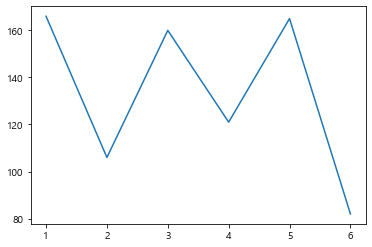

In [8]:
df['Generation'].value_counts().sort_index().plot()

In [9]:
df['Type 1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [10]:
df['Type 2'].unique()

array(['Poison', nan, 'Flying', 'Dragon', 'Ground', 'Fairy', 'Grass',
       'Fighting', 'Psychic', 'Steel', 'Ice', 'Rock', 'Dark', 'Water',
       'Electric', 'Fire', 'Ghost', 'Bug', 'Normal'], dtype=object)

In [11]:
len(df[df['Type 2'].notnull()]['Type 2'].unique())

18

-----

### 2-2) 데이터 특징 탐색

##### 변수들의 분포 탐색

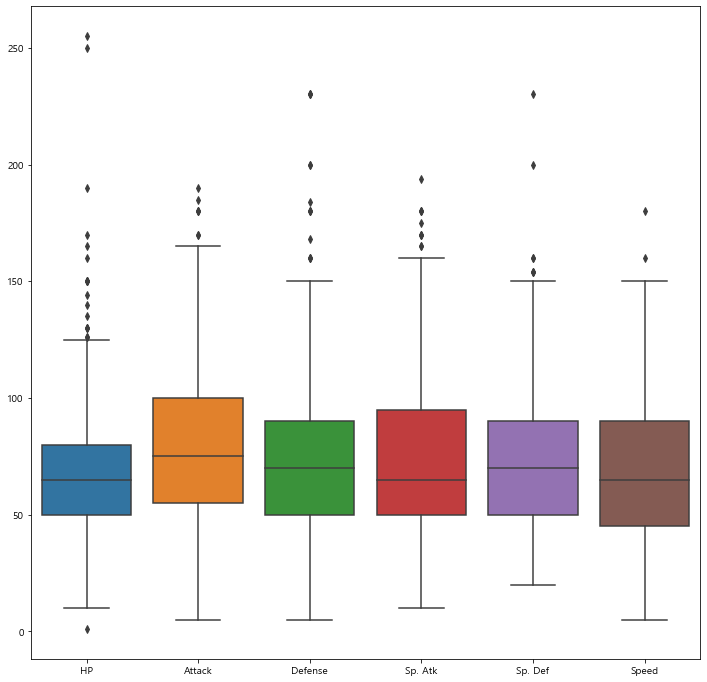

In [12]:
fig = plt.figure(figsize = (12, 12))
ax = fig.gca()
sns.boxplot(data = df[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']], ax = ax)
plt.show()

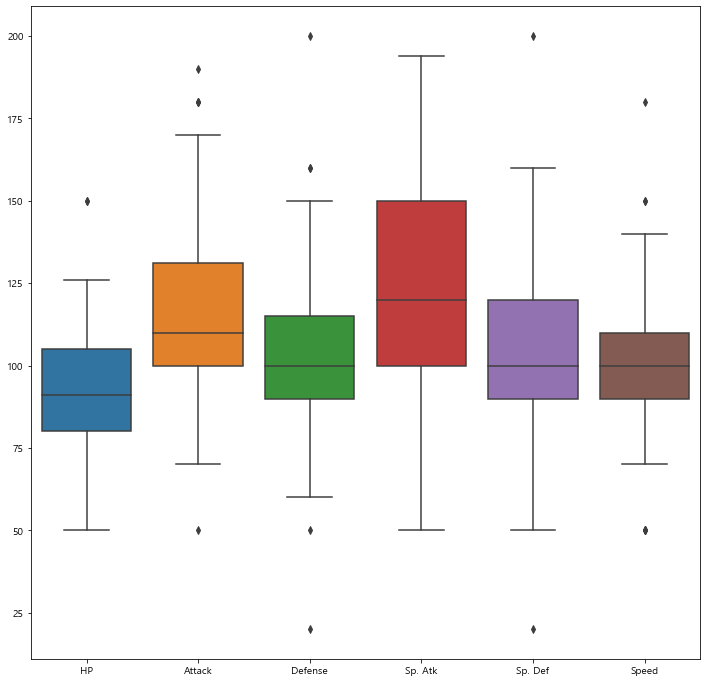

In [13]:
fig = plt.figure(figsize = (12, 12))
ax = fig.gca()
sns.boxplot(data = df[df['Legendary'] == 1][['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']], ax = ax)
plt.show()

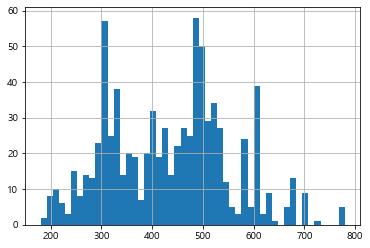

In [14]:
df['Total'].hist(bins = 50)

##### Legendary 그룹별 탐색

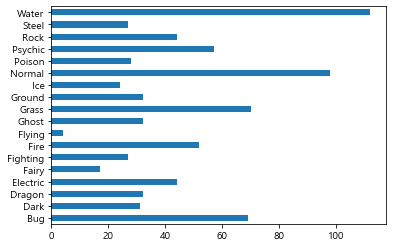

In [15]:
df['Type 1'].value_counts(sort = False).sort_index().plot.barh()

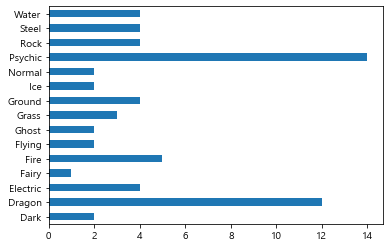

In [16]:
df[df['Legendary'] == 1]['Type 1'].value_counts(sort = False).sort_index().plot.barh()

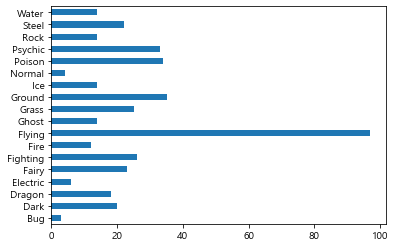

In [17]:
df['Type 2'].value_counts(sort = False).sort_index().plot.barh()

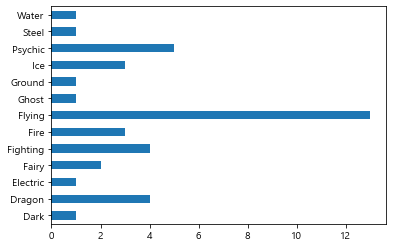

In [18]:
df[df['Legendary'] == 1]['Type 2'].value_counts(sort = False).sort_index().plot.barh()

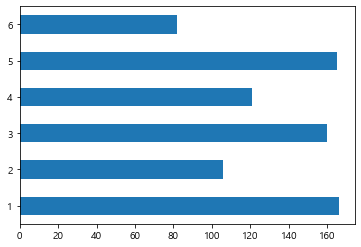

In [19]:
df['Generation'].value_counts(sort = False).sort_index().plot.barh()

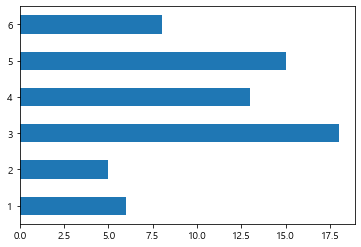

In [20]:
df[df['Legendary'] == 1]['Generation'].value_counts(sort = False).sort_index().plot.barh()

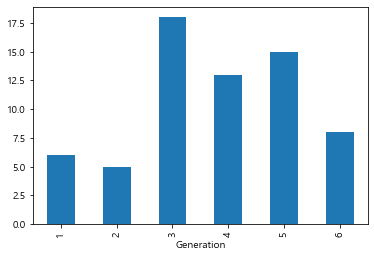

In [21]:
groups = df[df['Legendary'] == 1].groupby('Generation').size()
groups.plot.bar()

##### 포켓몬 능력 분포 탐색

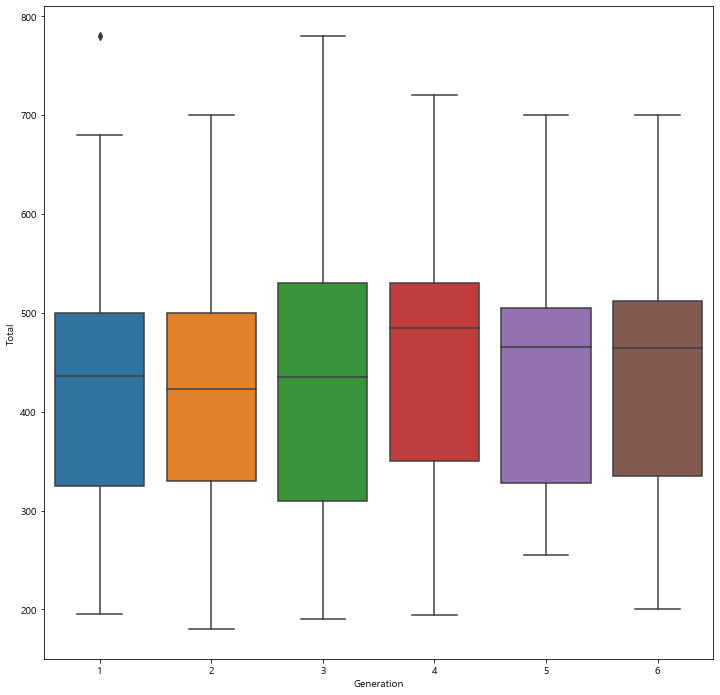

In [22]:
fig = plt.figure(figsize = (12, 12))
ax = fig.gca()
sns.boxplot(x = 'Generation', y = 'Total', data = df, ax = ax)
plt.show()

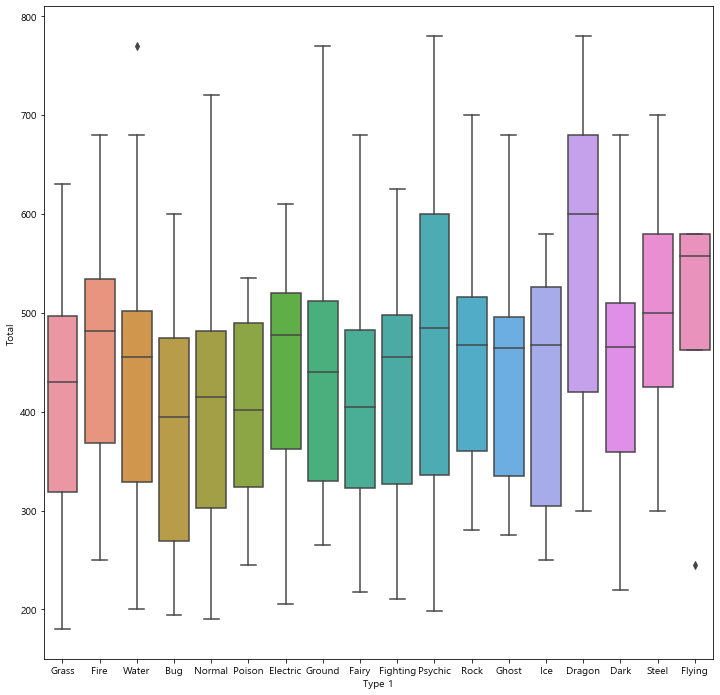

In [23]:
fig = plt.figure(figsize = (12, 12))
ax = fig.gca()
sns.boxplot(x = 'Type 1', y = 'Total', data = df, ax = ax)
plt.show()

-----

## 3) 지도 학습 기반 분류 분석

### 3-1) 데이터 전처리

##### 데이터 타입 변경

In [24]:
df['Legendary'] = df['Legendary'].astype(int)
df['Generation'] = df['Generation'].astype(str)
preprocessed_df = df[['Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation','Legendary']]

In [25]:
preprocessed_df.head()

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Grass,Poison,318,45,49,49,65,65,45,1,0
1,Grass,Poison,405,60,62,63,80,80,60,1,0
2,Grass,Poison,525,80,82,83,100,100,80,1,0
3,Grass,Poison,625,80,100,123,122,120,80,1,0
4,Fire,NaN,309,39,52,43,60,50,65,1,0


##### one-hot encoding

In [26]:
# get_dummies -> one hot encoding 자동
encoded_df = pd.get_dummies(preprocessed_df['Type 1'])
encoded_df.head()

,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [27]:
# pokemon type list
def make_list(x1, x2):
    type_list = []
    type_list.append(x1)
    if x2 is not np.nan:
        type_list.append(x2)
    return type_list

preprocessed_df['Type'] = preprocessed_df.apply(lambda x : make_list(x['Type 1'], x['Type 2']), axis = 1)
preprocessed_df.head()

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Type
0,Grass,Poison,318,45,49,49,65,65,45,1,0,"[Grass, Poison]"
1,Grass,Poison,405,60,62,63,80,80,60,1,0,"[Grass, Poison]"
2,Grass,Poison,525,80,82,83,100,100,80,1,0,"[Grass, Poison]"
3,Grass,Poison,625,80,100,123,122,120,80,1,0,"[Grass, Poison]"
4,Fire,NaN,309,39,52,43,60,50,65,1,0,[Fire]


In [28]:
del preprocessed_df['Type 1']
del preprocessed_df['Type 2']

In [29]:
preprocessed_df.head()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Type
0,318,45,49,49,65,65,45,1,0,"[Grass, Poison]"
1,405,60,62,63,80,80,60,1,0,"[Grass, Poison]"
2,525,80,82,83,100,100,80,1,0,"[Grass, Poison]"
3,625,80,100,123,122,120,80,1,0,"[Grass, Poison]"
4,309,39,52,43,60,50,65,1,0,[Fire]


In [30]:
# multilabel

from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
preprocessed_df = preprocessed_df.join(pd.DataFrame(mlb.fit_transform(preprocessed_df.pop('Type')), columns = mlb.classes_))

In [31]:
preprocessed_df.head()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Bug,...,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
0,318,45,49,49,65,65,45,1,0,0,...,0,1,0,0,0,1,0,0,0,0
1,405,60,62,63,80,80,60,1,0,0,...,0,1,0,0,0,1,0,0,0,0
2,525,80,82,83,100,100,80,1,0,0,...,0,1,0,0,0,1,0,0,0,0
3,625,80,100,123,122,120,80,1,0,0,...,0,1,0,0,0,1,0,0,0,0
4,309,39,52,43,60,50,65,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
preprocessed_df = pd.get_dummies(preprocessed_df)

In [33]:
preprocessed_df

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Bug,Dark,...,Psychic,Rock,Steel,Water,Generation_1,Generation_2,Generation_3,Generation_4,Generation_5,Generation_6
0,318,45,49,49,65,65,45,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,405,60,62,63,80,80,60,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,525,80,82,83,100,100,80,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,625,80,100,123,122,120,80,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,309,39,52,43,60,50,65,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,600,50,100,150,100,150,50,1,0,0,...,0,1,0,0,0,0,0,0,0,1
796,700,50,160,110,160,110,110,1,0,0,...,0,1,0,0,0,0,0,0,0,1
797,600,80,110,60,150,130,70,1,0,0,...,1,0,0,0,0,0,0,0,0,1
798,680,80,160,60,170,130,80,1,0,1,...,1,0,0,0,0,0,0,0,0,1


##### 피처 표준화

In [34]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()

# scale_columns = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
# preprocessed_df[scale_columns] = scaler.fit_transform(preprocessed_df[scale_columns])
# preprocessed_df.head()

In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scale_columns = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
preprocessed_df[scale_columns] = scaler.fit_transform(preprocessed_df[scale_columns])
preprocessed_df.head()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Bug,Dark,...,Psychic,Rock,Steel,Water,Generation_1,Generation_2,Generation_3,Generation_4,Generation_5,Generation_6
0,-0.976765,-0.950626,-0.924906,-0.797154,-0.239130,-0.248189,-0.801503,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,-0.251088,-0.362822,-0.524130,-0.347917,0.219560,0.291156,-0.285015,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.749845,0.420917,0.092448,0.293849,0.831146,1.010283,0.403635,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1.583957,0.420917,0.647369,1.577381,1.503891,1.729409,0.403635,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,-1.051836,-1.185748,-0.832419,-0.989683,-0.392027,-0.787533,-0.112853,0,0,0,...,0,0,0,0,1,0,0,0,0,0


##### 데이터셋 분리

In [36]:
from sklearn.model_selection import train_test_split

X = preprocessed_df.loc[:, preprocessed_df.columns != 'Legendary']
y = preprocessed_df['Legendary']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 33)

In [37]:
print(x_train.shape)
print(x_test.shape)

(600, 31)
(200, 31)


-----

### 3-2) Logistic Regression 모델 학습

##### 모델 학습

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

# train LR
lr = LogisticRegression(random_state = 0)
lr.fit(x_train, y_train)

# result
y_pred = lr.predict(x_test)

##### 모델 평가

In [39]:
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.955
0.6153846153846154
0.6666666666666666
0.64


In [40]:
from sklearn.metrics import confusion_matrix

confmat = confusion_matrix(y_true = y_test, y_pred = y_pred)
print(confmat)

[[183   5]
 [  4   8]]


-----

### 3-3) 클래스 불균형 조정

In [41]:
preprocessed_df['Legendary'].value_counts()

0    735
1     65
Name: Legendary, dtype: int64

##### 1:1 샘플링

In [42]:
positive_random_idx = preprocessed_df[preprocessed_df['Legendary'] == 1].sample(65, random_state = 33).index.to_list()
negative_random_idx = preprocessed_df[preprocessed_df['Legendary'] == 0].sample(65, random_state = 33).index.to_list()

##### 데이터셋 분리

In [43]:
random_idx = positive_random_idx + negative_random_idx

X = preprocessed_df.loc[random_idx, preprocessed_df.columns != 'Legendary']
y = preprocessed_df['Legendary'][random_idx]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 33)

In [44]:
x_train.shape
x_test.shape

(33, 31)

##### 모델 재학습

In [45]:
# train LR
lr = LogisticRegression(random_state = 0)
lr.fit(x_train, y_train)

# result
y_pred = lr.predict(x_test)

In [46]:
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.9696969696969697
0.9230769230769231
1.0
0.9600000000000001


In [47]:
from sklearn.metrics import confusion_matrix

confmat = confusion_matrix(y_true = y_test, y_pred = y_pred)
print(confmat)

[[20  1]
 [ 0 12]]


## 4) 비지도 학습 기반 군집 분류 분석

### 4-1) Kmeans 군집 분류

##### 2차원 군집 분석 (Kmeans)

k: 1 | cost: 1600.0
k: 2 | cost: 853.3477298974242
k: 3 | cost: 643.3631598164479
k: 4 | cost: 481.61819436198385
k: 5 | cost: 403.8864766981534


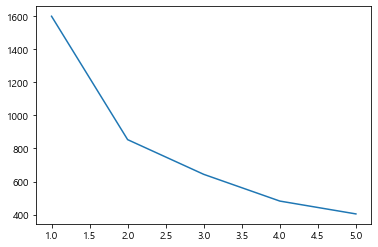

In [50]:
from sklearn.cluster import KMeans

X = preprocessed_df[['Attack', 'Defense']]

k_list = []
cost_list = []
for k in range(1, 6):
    kmeans = KMeans(n_clusters = k).fit(X)
    inertia = kmeans.inertia_
    print('k:', k, '| cost:', inertia)
    k_list.append(k)
    cost_list.append(inertia)

plt.plot(k_list, cost_list)

In [51]:
kmeans = KMeans(n_clusters = 4).fit(X)
cluster_num = kmeans.predict(X)
cluster = pd.Series(cluster_num)
preprocessed_df['cluster_num'] = cluster.values
preprocessed_df.head()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Bug,Dark,...,Rock,Steel,Water,Generation_1,Generation_2,Generation_3,Generation_4,Generation_5,Generation_6,cluster_num
0,-0.976765,-0.950626,-0.924906,-0.797154,-0.239130,-0.248189,-0.801503,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,-0.251088,-0.362822,-0.524130,-0.347917,0.219560,0.291156,-0.285015,0,0,0,...,0,0,0,1,0,0,0,0,0,3
2,0.749845,0.420917,0.092448,0.293849,0.831146,1.010283,0.403635,0,0,0,...,0,0,0,1,0,0,0,0,0,3
3,1.583957,0.420917,0.647369,1.577381,1.503891,1.729409,0.403635,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,-1.051836,-1.185748,-0.832419,-0.989683,-0.392027,-0.787533,-0.112853,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [52]:
print(preprocessed_df['cluster_num'].value_counts())

3    309
1    253
2    128
0    110
Name: cluster_num, dtype: int64


##### 군집 시각화

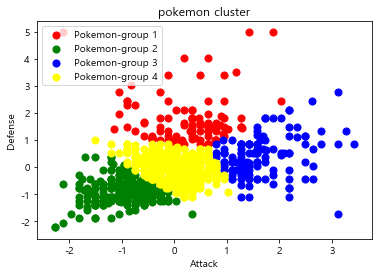

In [58]:
plt.scatter(preprocessed_df[preprocessed_df['cluster_num']==0]['Attack'],
           preprocessed_df[preprocessed_df['cluster_num']==0]['Defense'],
           s = 50, c = 'red', label = 'Pokemon-group 1')
plt.scatter(preprocessed_df[preprocessed_df['cluster_num']==1]['Attack'],
           preprocessed_df[preprocessed_df['cluster_num']==1]['Defense'],
           s = 50, c = 'green', label = 'Pokemon-group 2')
plt.scatter(preprocessed_df[preprocessed_df['cluster_num']==2]['Attack'],
           preprocessed_df[preprocessed_df['cluster_num']==2]['Defense'],
           s = 50, c = 'blue', label = 'Pokemon-group 3')
plt.scatter(preprocessed_df[preprocessed_df['cluster_num']==3]['Attack'],
           preprocessed_df[preprocessed_df['cluster_num']==3]['Defense'],
           s = 50, c = 'yellow', label = 'Pokemon-group 4')
plt.title('pokemon cluster')
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.legend()
plt.show()

##### 다차원 군집 분석 (Kmeans)

k: 1 | cost: 4800.0
k: 2 | cost: 3275.3812330305977
k: 3 | cost: 2862.1983147579813
k: 4 | cost: 2566.7933182394727
k: 5 | cost: 2328.0706840275643
k: 6 | cost: 2184.047708684333
k: 7 | cost: 2068.999794912865
k: 8 | cost: 1959.3632084484855
k: 9 | cost: 1858.0790622944141
k: 10 | cost: 1783.145565771
k: 11 | cost: 1700.1756621292197
k: 12 | cost: 1637.154555949744
k: 13 | cost: 1587.4546784302556
k: 14 | cost: 1535.2646797648297


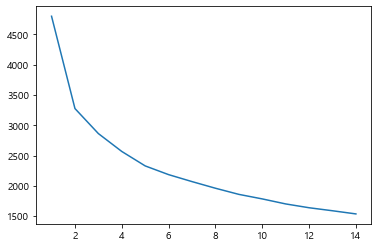

In [59]:
from sklearn.cluster import KMeans

X = preprocessed_df[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]

k_list = []
cost_list = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters = k).fit(X)
    inertia = kmeans.inertia_
    print('k:', k, '| cost:', inertia)
    k_list.append(k)
    cost_list.append(inertia)

plt.plot(k_list, cost_list)

In [60]:
kmeans = KMeans(n_clusters = 5).fit(X)
cluster_num = kmeans.predict(X)
cluster = pd.Series(cluster_num)
preprocessed_df['cluster_num'] = cluster.values
preprocessed_df.head()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Bug,Dark,...,Rock,Steel,Water,Generation_1,Generation_2,Generation_3,Generation_4,Generation_5,Generation_6,cluster_num
0,-0.976765,-0.950626,-0.924906,-0.797154,-0.239130,-0.248189,-0.801503,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,-0.251088,-0.362822,-0.524130,-0.347917,0.219560,0.291156,-0.285015,0,0,0,...,0,0,0,1,0,0,0,0,0,2
2,0.749845,0.420917,0.092448,0.293849,0.831146,1.010283,0.403635,0,0,0,...,0,0,0,1,0,0,0,0,0,2
3,1.583957,0.420917,0.647369,1.577381,1.503891,1.729409,0.403635,0,0,0,...,0,0,0,1,0,0,0,0,0,3
4,-1.051836,-1.185748,-0.832419,-0.989683,-0.392027,-0.787533,-0.112853,0,0,0,...,0,0,0,1,0,0,0,0,0,1


##### 군집별 특성 시각화

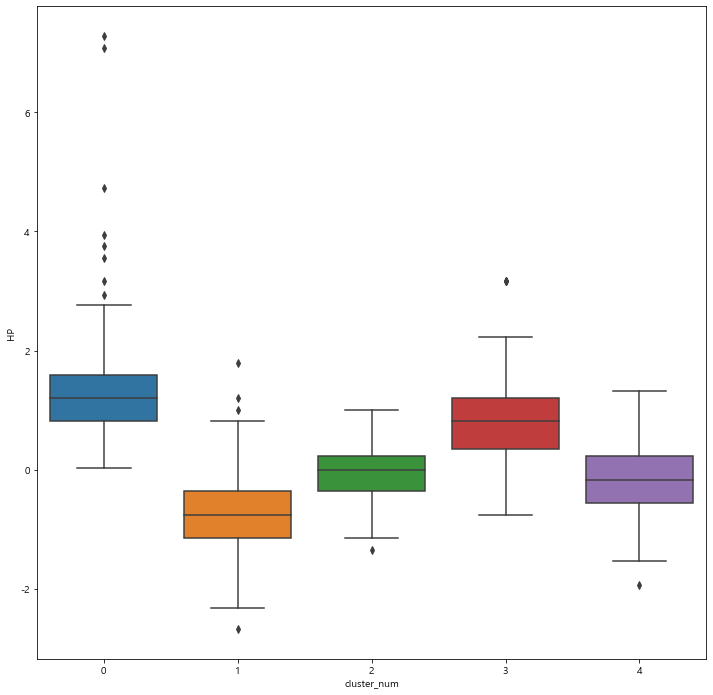

In [61]:
fig = plt.figure(figsize = (12, 12))
ax = fig.gca()
sns.boxplot(x = 'cluster_num', y = 'HP', data = preprocessed_df, ax = ax)
plt.show()

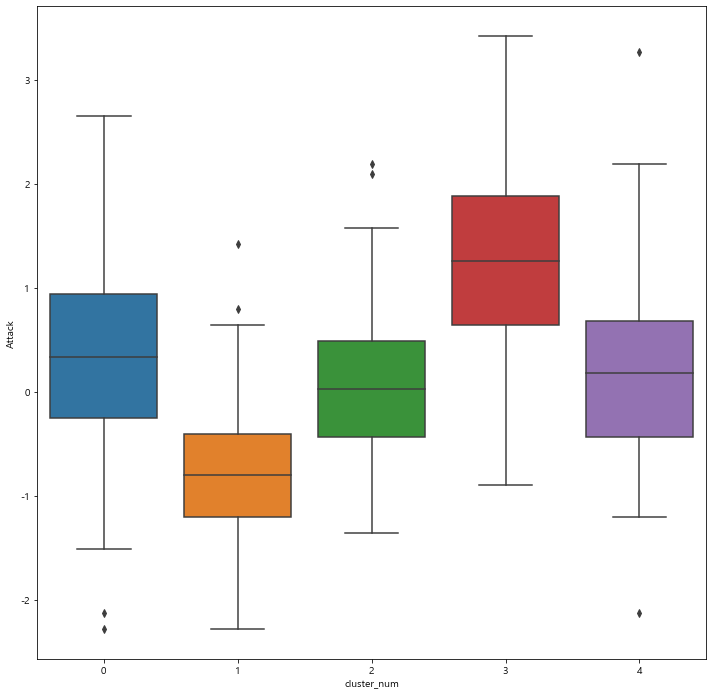

In [62]:
fig = plt.figure(figsize = (12, 12))
ax = fig.gca()
sns.boxplot(x = 'cluster_num', y = 'Attack', data = preprocessed_df, ax = ax)
plt.show()

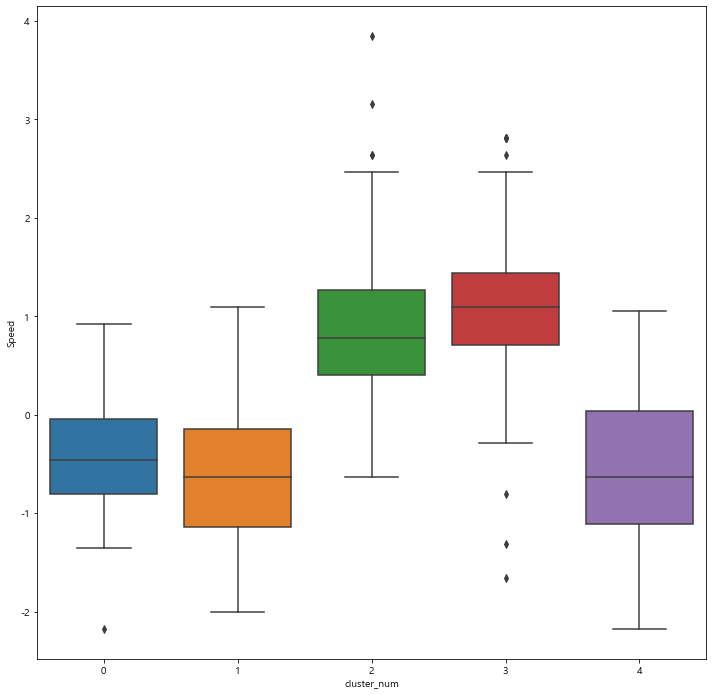

In [63]:
fig = plt.figure(figsize = (12, 12))
ax = fig.gca()
sns.boxplot(x = 'cluster_num', y = 'Speed', data = preprocessed_df, ax = ax)
plt.show()